In [ ]:
import pandas as pd
df1 = pd.read_csv('test.txt', names=['sentences', 'emotions'], sep=';')
df2 = pd.read_csv('train.txt', names=['sentences', 'emotions'], sep=';')

In [ ]:
df1

,sentences,emotions
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [ ]:
df = pd.concat([df1, df2])

In [ ]:
df

,sentences,emotions
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
category = pd.get_dummies(df.emotions)
df = pd.concat([df, category], axis=1)
df = df.drop(columns='emotions')
df

,sentences,anger,fear,joy,love,sadness,surprise
0,im feeling rather rotten so im not very ambiti...,0,0,0,0,1,0
1,im updating my blog because i feel shitty,0,0,0,0,1,0
2,i never make her separate from me because i do...,0,0,0,0,1,0
3,i left with my bouquet of red and yellow tulip...,0,0,1,0,0,0
4,i was feeling a little vain when i did this one,0,0,0,0,1,0
...,...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
15996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
15997,i feel strong and good overall,0,0,1,0,0,0
15998,i feel like this was such a rude comment and i...,1,0,0,0,0,0


In [ ]:
import re
df['sentences'] = df['sentences'].map(lambda x: re.sub(r'\W+', ' ', x))

In [ ]:
df

,sentences,anger,fear,joy,love,sadness,surprise
0,im feeling rather rotten so im not very ambiti...,0,0,0,0,1,0
1,im updating my blog because i feel shitty,0,0,0,0,1,0
2,i never make her separate from me because i do...,0,0,0,0,1,0
3,i left with my bouquet of red and yellow tulip...,0,0,1,0,0,0
4,i was feeling a little vain when i did this one,0,0,0,0,1,0
...,...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
15996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
15997,i feel strong and good overall,0,0,1,0,0,0
15998,i feel like this was such a rude comment and i...,1,0,0,0,0,0


In [ ]:
sentence = df['sentences'].values
label = df[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

In [ ]:
label

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
sen_latih, sen_test, label_latih, label_test = train_test_split(sentence, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=2000, oov_token='x')
tokenizer.fit_on_texts(sen_latih)
tokenizer.fit_on_texts(sen_test)

sekuens_latih = tokenizer.texts_to_sequences(sen_latih)
sekuens_test = tokenizer.texts_to_sequences(sen_test)

padding_latih = pad_sequences(sekuens_latih)
padding_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=2000, output_dim=16),
                             tf.keras.layers.LSTM(64),
                             
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
class MyCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch,logs ={}): 
        if(logs.get('accuracy')> 0.90 and logs.get('val_accuracy')> 0.90): 
            print("\n 90% acc reached")
            self.model.stop_training = True
callbacks = MyCallbacks()

In [ ]:
history = model.fit(padding_latih, 
                    label_latih,
                    epochs=30,
                    validation_data=(padding_test, label_test),
                    verbose=2,
                    callbacks=[callbacks])
                    

Epoch 1/30
450/450 - 11s - loss: 1.4118 - accuracy: 0.3774 - val_loss: 1.1192 - val_accuracy: 0.4847
Epoch 2/30
450/450 - 9s - loss: 0.8021 - accuracy: 0.6731 - val_loss: 0.6763 - val_accuracy: 0.7169
Epoch 3/30
450/450 - 9s - loss: 0.5571 - accuracy: 0.7586 - val_loss: 0.6000 - val_accuracy: 0.7519
Epoch 4/30
450/450 - 9s - loss: 0.4744 - accuracy: 0.7906 - val_loss: 0.5138 - val_accuracy: 0.8081
Epoch 5/30
450/450 - 9s - loss: 0.3514 - accuracy: 0.8726 - val_loss: 0.3972 - val_accuracy: 0.8636
Epoch 6/30
450/450 - 9s - loss: 0.2485 - accuracy: 0.9161 - val_loss: 0.3342 - val_accuracy: 0.8825
Epoch 7/30
450/450 - 9s - loss: 0.2071 - accuracy: 0.9256 - val_loss: 0.3070 - val_accuracy: 0.8947
Epoch 8/30
450/450 - 9s - loss: 0.1769 - accuracy: 0.9379 - val_loss: 0.3003 - val_accuracy: 0.8950
Epoch 9/30
450/450 - 9s - loss: 0.1533 - accuracy: 0.9447 - val_loss: 0.3658 - val_accuracy: 0.8972
Epoch 10/30
450/450 - 9s - loss: 0.1419 - accuracy: 0.9498 - val_loss: 0.2902 - val_accuracy: 0.901

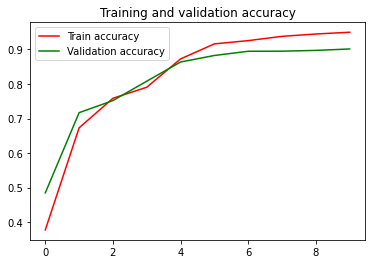

<Figure size 432x288 with 0 Axes>

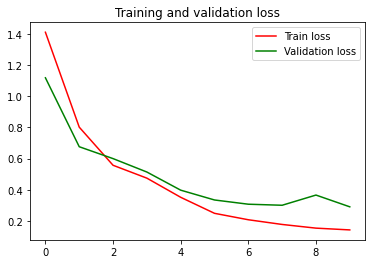

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Train accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Train loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()